In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
from PIL import Image

In [3]:
#nltk.download('punkt')

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from textblob import TextBlob

In [5]:
#  Reads text
sample = open("../input/texto.txt") 
s = sample.read() 

In [6]:
trad = TextBlob(f"{s}")
en = str(trad.translate(from_lang="es",to="en"))

In [7]:
en

"Yesterday I saw you asleep, shining in the dark\nAbsolutely in peace\nYou've run so much that you don't know where you are\nOr where you wanted to go\nYou could with the evil that I wanted to eat you\nYou fought like Arya Stark\nAnd from your scar are born lysergic flowers\nThat take me to the beyond\n\nYou are the hope of all mankind\nYou are the first light\nThe warrior woman who is going to get me out of here\nThe magic opportunity\n\nYou're waking up\nThat has gone through darkness\nWith a supernatural peace\nTo take me downtown\nOf a jade nebula\n\nYou're like crossing through the mirror\nHow to resurrect after seeing the tunnel\nYou can open the sea\nYou can cure it all\nYou are life on Mars\nYou are a fucking miracle\n\nYou're Harrison's crying guitar\nPink Floyd's psychedelia\nYou are the punch of John Bonham\nYou are the voice of Thom Yorke\n\nYou are the glow\nThat has gone through darkness\nWith a supernatural peace\nTo take me downtown\nOf a jade nebula\n\nMay my eyes go t

In [8]:
# Replaces escape character with space 
f = en.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
          
    data.append(temp) 
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 30, 
                                             window = 5, sg = 1) 


In [9]:
prueba = model2['earth']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [10]:
prueba.shape

(30,)

In [11]:
prueba

array([-0.00862329,  0.00812008,  0.00130041, -0.0041394 , -0.00798857,
       -0.01533671, -0.00562356, -0.01274933,  0.0041844 ,  0.00454563,
       -0.01585791,  0.00061122, -0.01599782, -0.01322332,  0.00439464,
       -0.01133921,  0.01029718,  0.01104028, -0.00222819,  0.00965242,
       -0.00386849,  0.01294265, -0.01209119, -0.00564239, -0.016519  ,
       -0.00571647,  0.00835573, -0.00107087, -0.00299215,  0.01644304],
      dtype=float32)

In [12]:
prueba.min()

-0.016518999

In [13]:
prueba.max()

0.016443038

In [14]:
normalizado = ((prueba-prueba.max())*((0-991)/(prueba.min()-prueba.max())))+991
normalizado = normalizado.astype(int)

In [19]:
no2 = sorted(normalizado)

In [20]:
no3 = sorted(normalizado,key = lambda a: a%2 == 0)

In [23]:
no4= sorted(no3)

In [24]:
todas = [normalizado,no3,no3,no4]

In [28]:
normalizado = [a for b in todas for a in b]

In [29]:
normalizado = np.asarray(normalizado)
normalizado2 = np.sort(normalizado,kind='mergesort')

In [153]:
normalizado2

array([  0,   0,   0,   0,  25,  25,  25,  25,  82,  82,  82,  82, 144,
       144, 144, 144, 207, 207, 207, 207, 220, 220, 220, 220, 234, 234,
       234, 234, 246, 246, 246, 246, 280, 280, 280, 280, 303, 303, 303,
       303, 378, 378, 378, 378, 402, 402, 402, 402, 415, 415, 415, 415,
       436, 436, 436, 436, 444, 444, 444, 444, 567, 567, 567, 567, 576,
       576, 576, 576, 640, 640, 640, 640, 666, 666, 666, 666, 716, 716,
       716, 716, 720, 720, 720, 720, 760, 760, 760, 760, 809, 809, 809,
       809, 845, 845, 845, 845, 874, 874, 874, 874, 878, 878, 878, 878,
       905, 905, 905, 905, 961, 961, 961, 961, 966, 966, 966, 966, 991,
       991, 991, 991])

In [154]:
normalizado

array([  0,  25,  82, 144, 207, 220, 234, 246, 280, 303, 378, 402, 415,
       436, 444, 567, 576, 640, 666, 716, 720, 760, 809, 845, 874, 878,
       905, 961, 966, 991,   0,  25,  82, 144, 207, 220, 234, 246, 280,
       303, 378, 402, 415, 436, 444, 567, 576, 640, 666, 716, 720, 760,
       809, 845, 874, 878, 905, 961, 966, 991,   0,  25,  82, 144, 207,
       220, 234, 246, 280, 303, 378, 402, 415, 436, 444, 567, 576, 640,
       666, 716, 720, 760, 809, 845, 874, 878, 905, 961, 966, 991,   0,
        25,  82, 144, 207, 220, 234, 246, 280, 303, 378, 402, 415, 436,
       444, 567, 576, 640, 666, 716, 720, 760, 809, 845, 874, 878, 905,
       961, 966, 991])

In [30]:
normalizado2 = list(normalizado) * 750

In [31]:
colores = pd.read_csv("../data/colores.csv")

In [32]:
def capa(x,param):
    nuevo = []
    param = str(f"{param}")
    for a in x:
        b = colores.iloc[a][f"{param}"]
        nuevo.append(b)
    return nuevo
def arrayReshape(lista):
    array = np.asarray(lista)
    otro = array.reshape(300,300)
    return otro

In [33]:
r = "R"
capaR = capa(normalizado2,r)
len(capaR)

90000

In [34]:
g = "G"
capaG = funCapa(normalizado2,g)

In [35]:
b = "B"
capab = funCapa(normalizado2,b)

In [36]:
rf, gf, bf = arrayReshape(capaR), arrayReshape(capaG), arrayReshape(capab)

In [37]:
capas = [rf,gf,bf]

In [38]:
imagen = np.stack(capas, axis=2).astype('uint8')

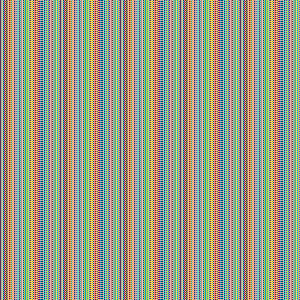

In [39]:
ayayay = Image.fromarray(imagen)
ayayay

In [40]:
#ayayay.save("prueba3.jpg")